In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

CSS = """
div.cell:nth-child(36) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
with open('../data/pubmed_result.txt', 'r', encoding="latin1") as myfile:
    data = myfile.read()

test_slice = data[:8331]
print(test_slice)


1. Bone. 2018 Sep 24. pii: S8756-3282(18)30355-7. doi: 10.1016/j.bone.2018.09.017.
[Epub ahead of print]

Quality of life in hypoparathyroidism.

Vokes T(1).

Author information: 
(1)The University of Chicago, Chicago, IL, United States. Electronic address:
tvokes@medicine.bsd.uchicago.edu.

Hypoparathyroidism is a rare endocrine disorder where deficiency (or lack of
effect) of parathyroid hormone results in disordered mineral metabolism leading
to hypocalcemia and hyperphosphatemia. Many patients with this disorder have
physical, emotional and cognitive complaints suggestive of impaired quality of
life (QOL). Several recent studies have demonstrated that hypoparathyroid
patients treated with calcium and vitamin D (conventional therapy) have reduced
QOL compared to either suitable controls or general population. QOL has also been
studied during treatment with PTH1-84, which has been FDA approved in the USA as 
an adjunct to calcium and vitamin D in patients not adequately controlled o

In [4]:
df = pd.read_csv('../data/labelled_data.csv', low_memory=False, index_col=0)

In [57]:
df.head()

,abstract,PMID,year,journal,title,author,prof,blood,dosage,clean_abstracts,significant
0,quality life hypoparathyroidism vokes author i...,30261328,2018.0,Bone,Quality of life in hypoparathyroidism,VokesT,VokesT,0.0,0.0,Hypoparathyroidism is a rare endocrine disorde...,no
1,vitamind status and its association with seaso...,30261231,2018.0,Neurosci Lett,Vitamin D status and its association with seas...,GuY ZhuZ LuanX HeJ,HeJ,1.0,0.0,BACKGROUND: Vitamin D plays a key role in depr...,yes
2,vitamind levels active tuberculosis latent tub...,30260729,2018.0,Fetal Pediatr Pathol,Vitamin D Levels in Active TB Latent TB Non-TB...,BuonsensoD SaliM PataD MasielloE SalernoG Cecc...,ValentiniP,0.0,0.0,BACKGROUND: Growing evidence suggests that vit...,yes
3,correlation vitamind binding protein gene poly...,30259785,2018.0,Per Med,Correlation of vitamin D binding protein gene ...,ChuaychooB TungtrongchitrR KriengsinyosW Tunti...,ChupeerachC,0.0,0.0,AIM: The risk of vitamin D binding protein (DB...,both
4,vitamind status including epicalcitriol among ...,30259504,2018.0,Endokrynol Pol,Vitamin D status including 3-epi-25OHD3 among ...,KmieP MinkiewiczI SworczakK mijewskiMA KowalskiK,KowalskiK,1.0,0.0,INTRODUCTION: In the context of pleiotropic vi...,yes


### Number of publications over the years

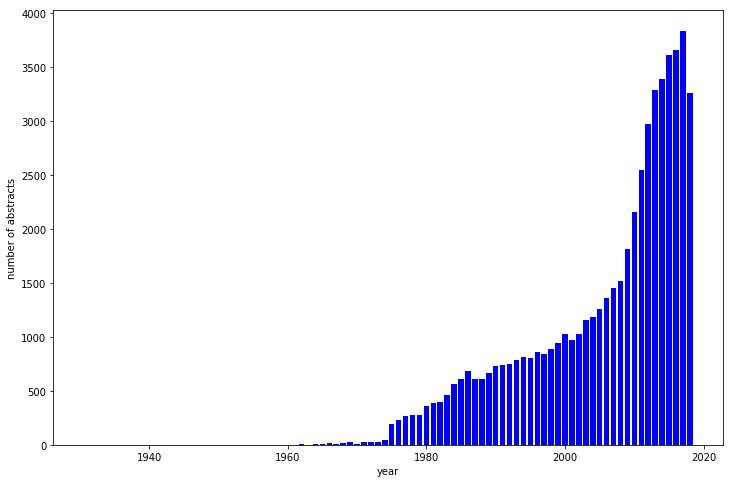

In [6]:
abstracts_year = df.groupby('year').count().reset_index()
plt.figure(figsize=(12,8))
plt.bar(abstracts_year['year'], abstracts_year['abstract'], color='b')
plt.xlabel('year')
plt.ylabel('number of abstracts')
plt.show()

The amount of publications on the subject of vitamin D. The interest has continously inscread sinde the 60s and basically exploded at around 2010.

### Length of abstracts

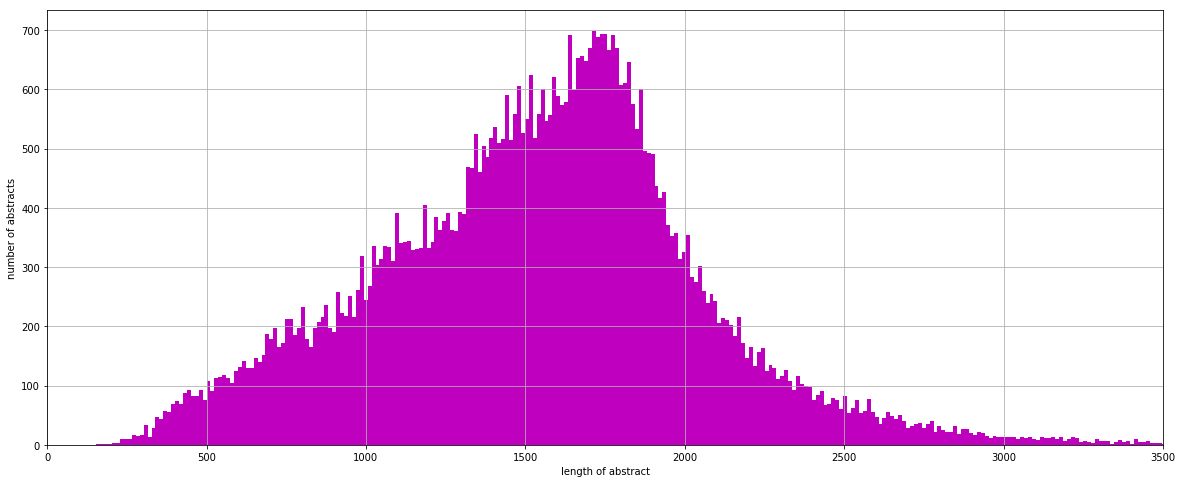

In [7]:
len_abstracts = df.clean_abstracts.str.len()

plt.figure(figsize=(20,8))
len_abstracts.hist(bins=1000, color='m')
plt.xlim(0,3500)
plt.xlabel('length of abstract')
plt.ylabel('number of abstracts')
plt.show()

There is an unexpected peak in the beginning. This due to the fact that very old abstracts are only indexed for reference and do not contain text.

In [8]:
df_len_abstracts = pd.DataFrame()
df_len_abstracts['year'] = df.year
df_len_abstracts['len'] = len_abstracts

In [9]:
year_len = pd.DataFrame(df_len_abstracts.groupby('year')['len'].mean())

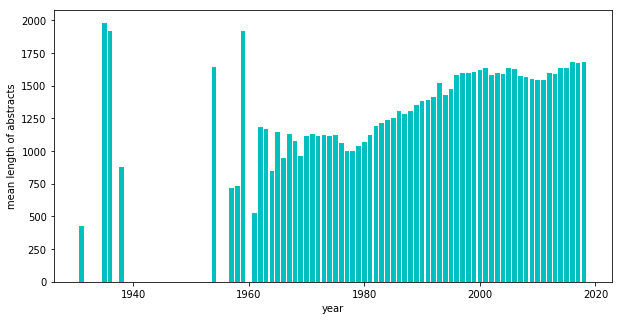

In [10]:
plt.figure(figsize=(10,5))
plt.bar(year_len.index, year_len['len'], color='c')
plt.xlabel('year')
plt.ylabel('mean length of abstracts')
plt.show()

At around 1975 abstracts are not just indexed but actually contain text.

### Length distribution of PMID

In [11]:
df['PMID'] = df.PMID.apply(lambda x: str(x))

len_PMID = pd.DataFrame()
len_PMID['abstract'] = df.abstract
len_PMID['len'] = df.PMID.str.len()

len_PMID_group = len_PMID.groupby('len').count().reset_index()

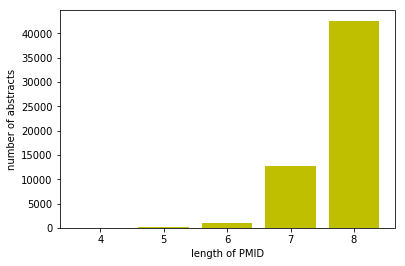

In [12]:
plt.bar(len_PMID_group['len'], len_PMID_group['abstract'], color='y')
plt.xlabel('length of PMID')
plt.ylabel('number of abstracts')
plt.show()

The PMID legnth ranges between 3 and 8 digits. Most abstracts have a PMID with a length of 8 digits.

### Is there a relationship between year of publication and length of PMID?
E.g. was the PMID shorter in the beginning?

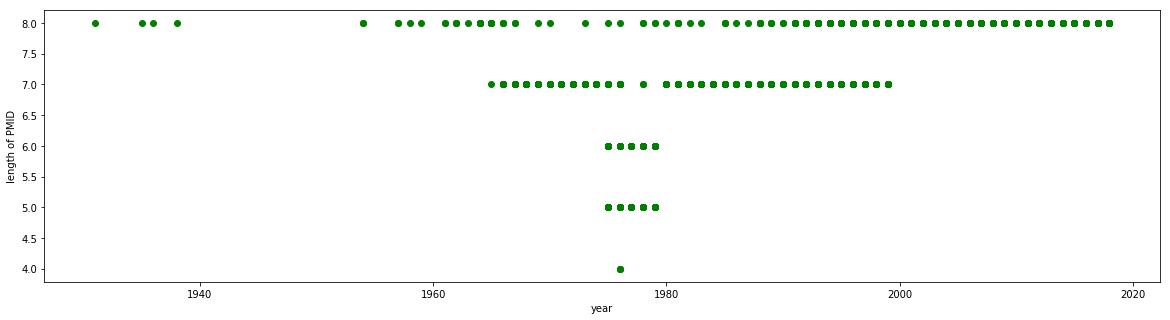

In [13]:
plt.figure(figsize=(20,5))
plt.scatter(df['year'],len_PMID.len, c='g')
plt.xlabel('year')
plt.ylabel('length of PMID')
plt.show()

There is no relationship between length of PMID and year of publication. Most abstracts have a PMID of 8 digits, and those abstracts are equally spaced between the years.

### Does the number of authors increase with time?

In [14]:
number_authors = df[df['author'].str.contains('NaN|(no authors listed)') == False]

C:\Users\Kaddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [15]:
number_authors['author_count'] = number_authors.author.str.count(' ')

In [16]:
number_authors['author_count'] = number_authors['author_count'].apply(lambda x: x + 1)

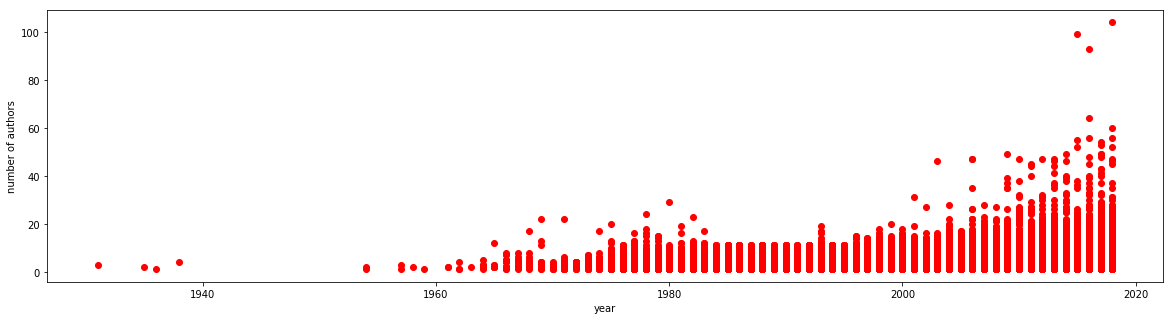

In [17]:
plt.figure(figsize=(20,5))
plt.scatter(number_authors['year'], number_authors['author_count'], color='r')
plt.xlabel('year')
plt.ylabel('number of authors')
plt.show()

The number of author a publication has gradually increased over the years. This is expected, since sience is becoming ever more complicated.

### Top 15 Journals

In [18]:
journal = df.groupby('journal').count().sort_values('abstract', ascending=False).iloc[:15,:1]
journal

,abstract
journal,
J Steroid Biochem Mol Biol,1071
J Clin Endocrinol Metab,1037
J Bone Miner Res,866
PLoS One,780
Endocrinology,736
Osteoporos Int,676
Calcif Tissue Int,671
Bone,565
Am J Clin Nutr,560


### Who are the vitamin D experts?
For determining the experts, the last author (usually the professor) is used.

In [19]:
df['prof'] = df.prof.str.replace('.', ' ', regex=False)
df['prof'] = df.prof.str.strip()

In [20]:
df_clean = df[df.prof.str.contains('etal') == False]
signi = df_clean[df_clean.significant.str.contains('0.0') == False]
no_signi = df_clean[df_clean.significant.str.contains('0.0') == True]

In [21]:
prof_all = df_clean.groupby('prof').count().sort_values('abstract', ascending=False)
prof_signi = signi.groupby('prof').count().sort_values('abstract', ascending=False)
prof_no_signi = no_signi.groupby('prof').count().sort_values('abstract', ascending=False)

#### The top 10 experts are:

In [22]:
display(prof_all.iloc[:10,:1])
display(prof_signi.iloc[:10,:1])
display(prof_no_signi.iloc[:10,:1])

,abstract
prof,
DeLucaHF,404
HolickMF,199
NormanAW,194
FeldmanD,117
SudaT,97
KumarR,96
BouillonR,95
CarlbergC,94
JonesG,83


,abstract
prof,
DeLucaHF,91
HolickMF,57
NormanAW,50
FeldmanD,36
SlatopolskyE,32
PakCY,31
AsemiZ,30
HollisBW,30
ReidIR,29


,abstract
prof,
DeLucaHF,313
NormanAW,144
HolickMF,142
FeldmanD,81
SudaT,81
KumarR,74
CarlbergC,73
StudzinskiGP,72
BouillonR,67


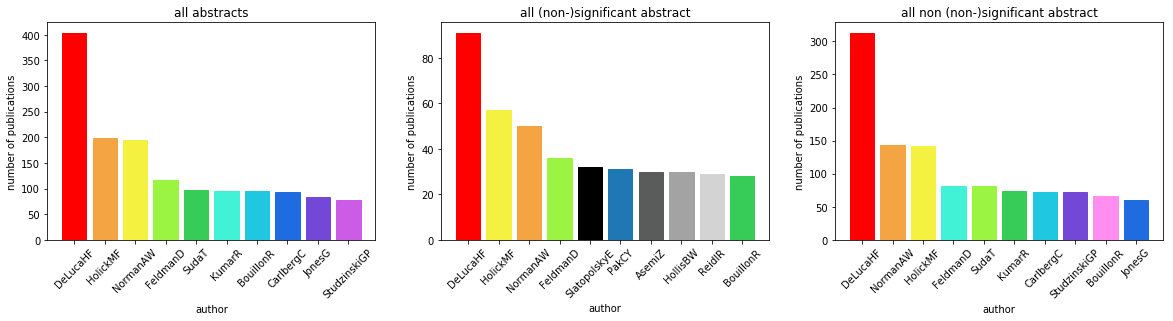

In [23]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
x1 = plt.bar(prof_all.index[:10], prof_all['abstract'][:10])
x1[0].set_color('r')
x1[1].set_color('#f4a442')
x1[2].set_color('#f4f141')
x1[3].set_color('#9af441')
x1[4].set_color('#37cc57')
x1[5].set_color('#41f2d7')
x1[6].set_color('#1fc7e0')
x1[7].set_color('#1e6ce0')
x1[8].set_color('#7348d6')
x1[9].set_color('#cc5be5')
plt.title('all abstracts')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
x2= plt.bar(prof_signi.index[:10], prof_signi['abstract'][:10])
x2[0].set_color('r')
x2[1].set_color('#f4f141')
x2[2].set_color('#f4a442')
x2[3].set_color('#9af441')
x2[4].set_color('k')
x2[6].set_color('#5a5b5b')
x2[7].set_color('#a3a3a3')
x2[8].set_color('#d3d3d3')
x2[9].set_color('#37cc57')
plt.title('all (non-)significant abstract')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
x3 = plt.bar(prof_no_signi.index[:10], prof_no_signi['abstract'][:10])
x3[0].set_color('r')
x3[1].set_color('#f4a442')
x3[2].set_color('#f4f141')
x3[3].set_color('#41f2d7')
x3[4].set_color('#9af441')
x3[5].set_color('#37cc57')
x3[6].set_color('#1fc7e0')
x3[7].set_color('#7348d6')
x3[8].set_color('#ff8ef0')
x3[9].set_color('#1e6ce0')
plt.title('all non (non-)significant abstract')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)

plt.show()

### Who are the most proliferent authors?
- the last authors are removed (usually the professor)
- the top 10 vitamin D experts are removed

In [24]:
no_prof = df.author.str.rsplit(' ', n=1).str.get(0)

In [25]:
authors_only = pd.DataFrame()
authors_only['authors'] = no_prof
authors_only['authors'] = authors_only.authors.str.replace('DeLucaHF|NormanAW|HolickMF|FeldmanD|BouillonR|KumarR|\
SudaT|CarlbergC|JonesG|HausslerMR', 'None', regex=True)
single_authors = authors_only.authors.str.split(' ', expand=True)

In [26]:
authors = pd.DataFrame()

for column in range(single_authors.shape[1]):
    authors = pd.concat((authors,single_authors[column]), axis=0)

In [27]:
authors = authors[authors[0].str.contains('None') == False]

In [28]:
authors['count'] = np.zeros((len(authors),1))

In [29]:
prolif_author = authors.groupby(0).count().sort_values('count',ascending=False)[:10]
prolif_author

,count
0,
HollisBW,194
HorstRL,151
WangX,149
WangY,140
ZhangY,129
WangJ,129
BikleDD,128
GrantWB,117
WangL,117


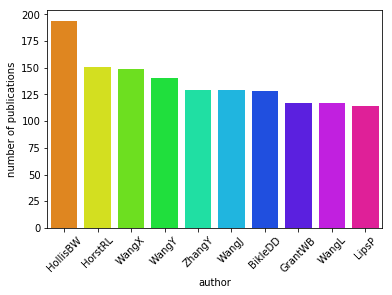

In [30]:
sns.barplot(prolif_author.index, y = prolif_author['count'], data = prolif_author, palette='hsv')
plt.xlabel('author')
plt.ylabel('number of publications')
plt.xticks(rotation=45)
plt.show()

### In which journals do the experts prefer to publish?

In [31]:
prof_10 = df[df.prof.str.contains('DeLucaHF|NormanAW|HolickMF|FeldmanD|BouillonR|KumarR|SudaT|CarlbergC|JonesG\
|HausslerMR') == True]

In [32]:
prof_10_journal = prof_10.groupby('journal').count().sort_values('abstract', ascending=False).iloc[:15,:1]
prof_10_journal['Top 15 Journal'] = np.zeros((len(prof_10_journal),1))

In [33]:
same = 0

for entry in range(len(journal.index)):
    if prof_10_journal.index[entry] in journal.index:
        same += 1
    prof_10_journal.loc[prof_10_journal.index[entry], 'Top 15 Journal'] = prof_10_journal.index[entry] in journal.index

In [34]:
prof_10_journal

,abstract,Top 15 Journal
journal,,
J Biol Chem,97,True
Endocrinology,88,True
Proc Natl Acad Sci U S A,73,False
Arch Biochem Biophys,68,False
J Steroid Biochem Mol Biol,63,True
Biochem Biophys Res Commun,54,True
J Bone Miner Res,48,True
Biochemistry,38,False
J Clin Endocrinol Metab,38,True


In [35]:
print(f'Number of journals that are preferred by the experts and are also on the Top 15 journal list: {same}')

Number of journals that are preferred by the experts and are also on the Top 15 journal list: 8


### Is there a relationship between number of authors and journal
E.g. Nature is known for its ridiculously long author lists

In [36]:
author_journal = pd.DataFrame()
author_journal['abstract'] = df['abstract']
author_journal['journal'] = df['journal']
author_journal['author_count'] = number_authors['author_count']

In [37]:
author_journal.sort_values('author_count', ascending=False).iloc[:15,:]

,abstract,journal,author_count
1260,genomewide association study europeanancestry ...,Nat Commun,104.0
30599,conversion from clinically isolated syndrome t...,Mult Scler,99.0
27295,french law: what about a reasoned reimbursemen...,Geriatr Psychol Neuropsychiatr Vieil,93.0
28514,genetic evidence for causal relationships betw...,JAMA,64.0
25023,transethnic evaluation identifies low-frequenc...,J Clin Endocrinol Metab,60.0
488,circulating vitamind and colorectal cancer ris...,J Natl Cancer Inst,56.0
4906,cypa variant modifies the association between ...,Br J Cancer,56.0
29999,correction: vitamin d metabolic pathway genes ...,PLoS One,55.0
26419,circulating concentrations of biomarkers and m...,Am J Clin Nutr,54.0
25875,low-frequency synonymous coding variation in c...,Am J Hum Genet,53.0


Top 15 of abstracts with most authors.

In [38]:
aj_median = pd.DataFrame(author_journal.groupby('journal')['author_count'].median())

In [39]:
median_authors = aj_median.sort_values('author_count', ascending=False).iloc[:50,:]

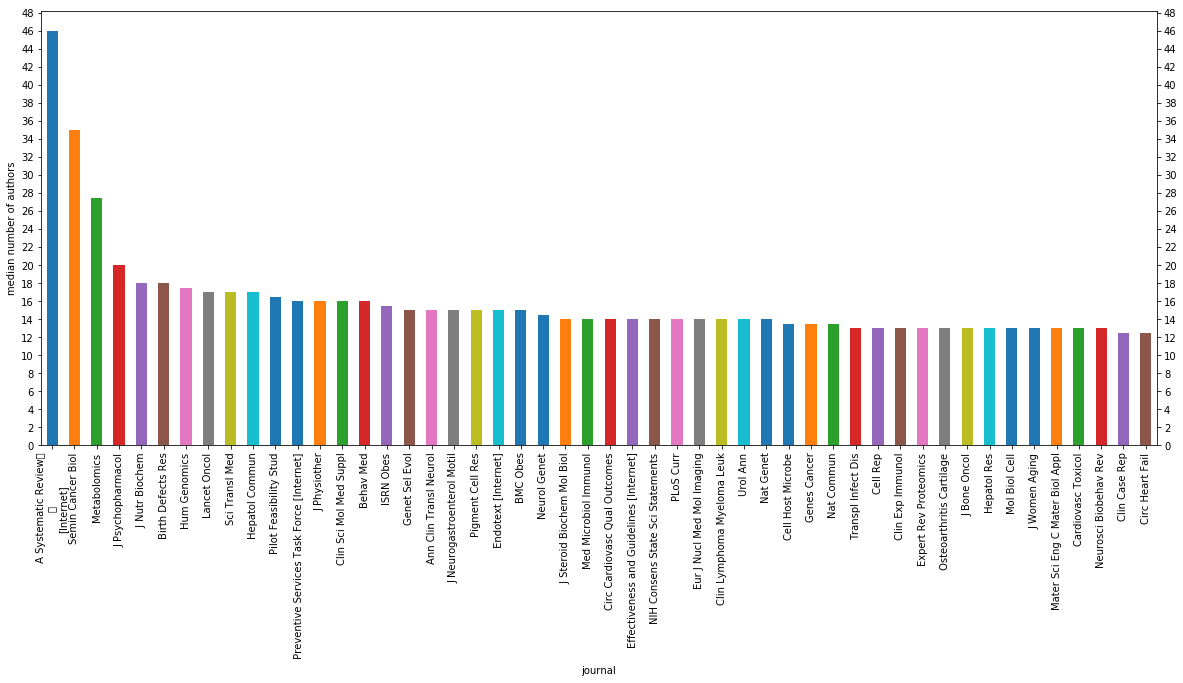

In [40]:
plt.figure(figsize=(20,8))
median_authors['author_count'].plot.bar()
plt.ylabel('median number of authors')
plt.yticks(np.arange(0,50,2))
plt.tick_params(labelright=True, right=True)
plt.show()

Maximum median of authors are 46 authors (A Systematic Review).

### Are abstracts with a vitamin D dose more likely to report of (non-)significant results?

In [41]:
dosage_signi = pd.DataFrame(df.groupby(['dosage','significant']).count().iloc[:,0])

In [42]:
percent = []

for entry in range(int(len(dosage_signi)/2)):
    count = int(len(dosage_signi)/2)
    percent.append(np.round((dosage_signi.iloc[entry,0]/(dosage_signi.iloc[0:4,0].sum()) * 100),1))

for entry in range(int(len(dosage_signi)/2)):
    count = entry + int(len(dosage_signi)/2)
    percent.append(np.round((dosage_signi.iloc[count,0]/(dosage_signi.iloc[4:8,0].sum()) * 100),1))

In [43]:
dosage_signi['%'] = percent

In [44]:
dosage_signi

abstract     %
dosage significant                
0.0    0.0             30908  59.1
       both             3662   7.0
       no               2902   5.6
       yes             14808  28.3
1.0    0.0              1800  43.1
       both              589  14.1
       no                405   9.7
       yes              1378  33.0

Abstracts with a vitamin D doses are more likely to report (non-)significant results.

### Are abstracts with vitamin D blood serum measurement more likely to report of (non-)significant results?

In [45]:
blood_signi = pd.DataFrame(df.groupby(['blood','significant']).count().iloc[:,0])

In [46]:
percent = []
start = 0
end = 4

for entry in range(len(blood_signi)):
    if (entry % 4 == 0 and entry > 0):
        start += 4
        end += 4
    percent.append(np.round(blood_signi.iloc[entry,0]/blood_signi.iloc[start:end,0].sum() * 100,1))

In [47]:
blood_signi['%'] = percent

In [48]:
blood_signi

abstract     %
blood significant                
0.0   0.0             29999  59.9
      both             3472   6.9
      no               2832   5.7
      yes             13818  27.6
1.0   0.0              2709  42.8
      both              779  12.3
      no                475   7.5
      yes              2368  37.4

Abstracts with a vitamin D blood serum measurement are more likely to report (non-)significant results.

### How often is a blood serum measurement taken after vitamin D administration?

In [49]:
dose_blood = pd.DataFrame(df.groupby(['dosage','blood']).count().iloc[:,0])

In [50]:
percent = []
start = 0
end = 2

for entry in range(len(dose_blood)):
    if (entry % 2 == 0 and entry > 0):
        start += 2
        end += 2
    percent.append(np.round(dose_blood.iloc[entry,0]/dose_blood.iloc[start:end,0].sum() * 100,1))

In [51]:
dose_blood['%'] = percent

In [52]:
dose_blood[2:4]

abstract     %
dosage blood                
1.0    0.0        3046  73.0
       1.0        1126  27.0

Only in 26 % of all cases is a vitamin D blood serum measurement taken after vitamin D administration. That is a rather low number, considering that every human takes a different dose to reach a certain serum level. This might make results non-significant, even though they would be if they would have checked if the dose had the desired effect on serum level.

### Does the comibination of serum level measurement after dosage administration result in more positive significant results?

In [53]:
dose_blood_signi = pd.DataFrame(df.groupby(['dosage','blood', 'significant']).count().iloc[:,0])

In [54]:
percent = []
start = 0
end = 4

for entry in range(len(dose_blood_signi)):
    if (entry % 4 == 0 and entry > 0):
        start += 4
        end += 4
    percent.append(np.round(dose_blood_signi.iloc[entry,0]/dose_blood_signi.iloc[start:end,0].sum() * 100,1))

In [55]:
dose_blood_signi['%'] = percent

In [56]:
dose_blood_signi

abstract     %
dosage blood significant                
0.0    0.0   0.0             28654  60.9
             both             3051   6.5
             no               2551   5.4
             yes             12819  27.2
       1.0   0.0              2254  43.3
             both              611  11.7
             no                351   6.7
             yes              1989  38.2
1.0    0.0   0.0              1345  44.2
             both              421  13.8
             no                281   9.2
             yes               999  32.8
       1.0   0.0               455  40.4
             both              168  14.9
             no                124  11.0
             yes               379  33.7

If blood serum is checked after dose administration, results are more likely to be (non-)significant, however, they are not more likely to report positive significance compared to a missing blood serum measurement. If just the blood serum level is measured, abstracts are even more likely to reporte a positive significance.